### The behaviour of charged particles (ions) during new particle formation events in urban Leipzig (Germany)
https://doi.org/10.5194/egusphere-2024-742 

The aim of this paper was to better understand the behaviour of charged particles and their behaviour during atmospheric NPF in an urban environment.

The air ion/charged particle population was mobility classified into small (0.8–1.6 nm), intermediate (1.6–7.5 nm), and large particles (7.5–22 nm) for analysis, following the classification system outlined by Tammet (2006).

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/home/coliewo/Desktop/analysis/combined_test1.nc'
data = xr.open_dataset(file_path)

#To convert the diameter values to nm
dataset = data.assign_coords(diameter=data['diameter'] * 1e9)

In [2]:
neg_ions = dataset.neg_ions
pos_ions = dataset.pos_ions

#### Be careful overwritting variable outputs...

In [4]:
neg_ions

<xarray.DataArray 'neg_ions' (time: 1081, diameter: 55)>
array([[        nan,         nan,         nan, ...,         nan,         nan,
                nan],
       [        nan,         nan,         nan, ...,         nan,         nan,
                nan],
       [        nan,         nan,         nan, ...,         nan,         nan,
                nan],
       ...,
       [ 319.168421,  576.253182,  811.837068, ..., 1115.13203 , 1399.941443,
                nan],
       [ 417.303053,  684.918097,  998.645225, ..., 1450.282291, 1462.189887,
                nan],
       [ 428.386073,  740.360866, 1139.612397, ...,  336.959821,  497.591679,
                nan]])
Coordinates:
  * diameter  (diameter) float64 0.8029 0.8628 0.9273 ... 35.61 38.46 41.55
  * time      (time) datetime64[ns] 2024-05-16 ... 2024-06-30
Attributes:
    units:        cm-3
    description:  Negative ion number-size distribution (dN/dlogDp)

In [18]:
# Divide the data into the small, large, and intermediate particles
small_neg_ions = neg_ions.sel(diameter=slice(0.8,1.6))
small_pos_ions = pos_ions.sel(diameter=slice(0.8,1.6))
intermediate_neg_ions = neg_ions.sel(diameter=slice(1.6,7.5))
intermediate_pos_ions = pos_ions.sel(diameter=slice(1.6,7.5))
large_neg_ions = neg_ions.sel(diameter=slice(7.5,22.0))
large_pos_ions = pos_ions.sel(diameter=slice(7.5,22.0))     

In [35]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
small_neg_ions = small_neg_ions.mean(dim='diameter').to_dataframe().reset_index()
small_neg_ions['time'] = pd.to_datetime(small_neg_ions['time'])
small_neg_ions_df = small_neg_ions.set_index('time')

# Statistical summary
small_neg_ions_df.describe()

,neg_ions
count,1007.000000
mean,827.414573
std,353.175334
min,191.757918
25%,567.277006
50%,795.184340
75%,1027.742091
max,4342.143601


In [38]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
small_pos_ions = small_pos_ions.mean(dim='diameter').to_dataframe().reset_index()
small_pos_ions['time'] = pd.to_datetime(small_pos_ions['time'])
small_pos_ions_df = small_pos_ions.set_index('time')

# Statistical summary
small_pos_ions_df.describe()

,pos_ions
count,1007.000000
mean,948.439478
std,373.906032
min,77.546723
25%,696.572720
50%,914.831419
75%,1177.181043
max,5131.277780


In [36]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
intermediate_neg_ions = intermediate_neg_ions.mean(dim='diameter').to_dataframe().reset_index()
intermediate_neg_ions['time'] = pd.to_datetime(intermediate_neg_ions['time'])
intermediate_neg_ions_df = intermediate_neg_ions.set_index('time')

# Statistical summary
intermediate_neg_ions_df.describe()

,neg_ions
count,1007.000000
mean,89.398177
std,125.067993
min,5.936368
25%,41.449638
50%,61.778435
75%,97.848207
max,2567.038970


In [39]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
intermediate_pos_ions = intermediate_pos_ions.mean(dim='diameter').to_dataframe().reset_index()
intermediate_pos_ions['time'] = pd.to_datetime(intermediate_pos_ions['time'])
intermediate_pos_ions_df = intermediate_pos_ions.set_index('time')

# Statistical summary
intermediate_pos_ions_df.describe()

,pos_ions
count,1007.000000
mean,94.687042
std,890.278657
min,-162.192623
25%,17.958367
50%,34.889410
75%,72.426970
max,28058.007909


In [37]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
large_neg_ions = large_neg_ions.mean(dim='diameter').to_dataframe().reset_index()
large_neg_ions['time'] = pd.to_datetime(large_neg_ions['time'])
large_neg_ions_df = large_neg_ions.set_index('time')

# Statistical summary
large_neg_ions_df.describe()

,neg_ions
count,1007.000000
mean,2338.416049
std,5792.397301
min,33.382587
25%,338.440074
50%,675.154164
75%,1665.997885
max,96688.503003


In [40]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
large_pos_ions = large_pos_ions.mean(dim='diameter').to_dataframe().reset_index()
large_pos_ions['time'] = pd.to_datetime(large_pos_ions['time'])
large_pos_ions_df = large_pos_ions.set_index('time')

# Statistical summary
large_pos_ions_df.describe()

,pos_ions
count,1007.000000
mean,644.226926
std,874.946686
min,2.148323
25%,240.620474
50%,432.037005
75%,779.234123
max,19028.169008


In [41]:
# Total
pos_ions = pos_ions.mean(dim='diameter').to_dataframe().reset_index()
pos_ions['time'] = pd.to_datetime(pos_ions['time'])
pos_ions_df = pos_ions.set_index('time')

# Statistical summary
pos_ions_df.describe()

,pos_ions
count,1007.000000
mean,578.882921
std,737.831209
min,70.484091
25%,367.861417
50%,468.042937
75%,645.657819
max,16799.728671


In [42]:
# Total
neg_ions = neg_ions.mean(dim='diameter').to_dataframe().reset_index()
neg_ions['time'] = pd.to_datetime(neg_ions['time'])
neg_ions_df = neg_ions.set_index('time')

# Statistical summary
neg_ions_df.describe()

,neg_ions
count,1007.000000
mean,1040.703782
std,1775.329141
min,89.739050
25%,411.771323
50%,548.151784
75%,903.357390
max,29380.797455


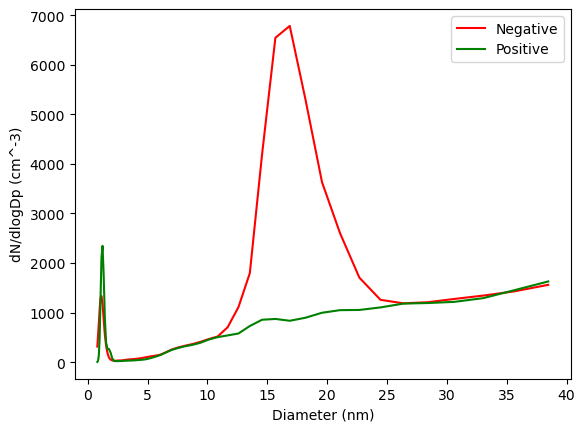

In [45]:
# Total particles dist over 
neg_i = dataset.neg_ions.mean(dim='time')
pos_i = dataset.pos_ions.mean(dim='time')

#plot
# Plotting both the curves simultaneously 
plt.plot(neg_i['diameter'], neg_i.values, color='r', label='Negative') 
plt.plot(pos_i['diameter'], pos_i.values, color='g', label='Positive') 

plt.xlabel('Diameter (nm)') 
plt.ylabel('dN/dlogDp (cm^-3)')

plt.legend()
plt.show()